### El látigo y las ondas de choque

1. Considere primero el caso de una cuerda con la misma *masa por unidad de longitud* a la cual se le imprime un pulso en uno de sus extremos y el otro extremo está fijo. Calcular la velocidad y el desplazamiento del otro extremo. Para darse una idea puede utilizar alguno de los simuladores que hay disponibles en la red. El de la Universidad de Colorado es particularmente bueno.


$$ \frac{\partial^2 y}{\partial x^2} = \frac{1}{v^2} \frac{\partial^2 y}{\partial t^2}$$

### Model Assumption

$$  Y(x, t) = X(x)\cdot T(t) $$


#### Spatial Equation


$$ \frac{\partial^2 }{\partial x^2} X(x) = kX(x) $$

**System of first order equation**


$$ \frac{\partial }{\partial x} X(x) = U(x) $$

$$ \frac{\partial}{\partial x} U(x) = kX(x) $$

$$  $$


### Temporal Equation

$$ \frac{\partial^2 }{\partial x^2} T(x) = kT(x)v^2 $$


**System of first order equation**


$$ \frac{\partial }{\partial x} T(t) = U(t) $$

$$ \frac{\partial}{\partial x} U(t) = kT(t)v^2 $$



Para la parte de x: solucionarla con una estrategia que contemple las condiciones de frontera

source: https://docs.scipy.org/doc/scipy/reference/generated/scipy.integrate.solve_bvp.html


0.0 0.9129452507276277
0.0 0.9129452507276277
1.4901161193847656e-08 0.9129452507276277
0.0 0.9129452507276277
0.0 0.9129452792327332
0.0 0.9129452507276277
0.0 0.0
0.0 0.0


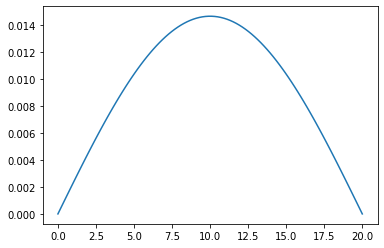

In [58]:
from scipy.integrate import odeint, solve_bvp, solve_ivp
import numpy as np 
import math

L = 20
n = 1
k = n*math.pi/L
v = 1


def Xfun(x, y):
    X, u = y
    dXdx = [u, (-k**2)*X ]
    return dXdx


def Tfun(x, y):
    T, u = y
    dTdt = [u, (-k**2)*T*v**2 ]
    return dTdt


#  ya  -> y(a) = ya
#  yb  -> y(b) = yb
#  a = 0
#  b = L

#   y(b) - 1 = 0

def bc(ya, yb):
    print(ya[0], yb[0])
    return [ ya[0],  yb[0]]


x = np.linspace(0, L, 100)
y_guess = np.zeros( (2, x.size) )
y_guess[0] = np.sin( x )


res_x = solve_bvp(Xfun, bc, x, y_guess)


import matplotlib.pyplot as plt 

plt.plot( x, res_x.sol(x)[0] )


# k = 2

# x0 = [ 0, 10]
# x = np.linspace(0, 6, 1000)

# sol = odeint(Xfun, x0, x, args=(k,))